In [20]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [21]:
Nasdaq = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/R & Python Programming/3-2 SelfStudy/Nasdaq.csv", index_col=0)

In [22]:
Nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,247.100006,278.899994,245.800003,278.700012,278.700012,1782060000
1985-02-01,277.899994,289.299988,277.899994,284.200012,284.200012,1742850000
1985-03-01,285.100006,287.799988,275.600006,279.200012,279.200012,1611310000
1985-04-01,279.500000,284.799988,276.200012,280.600006,280.600006,1506450000
1985-05-01,280.500000,294.799988,278.799988,290.799988,290.799988,1673270000


In [23]:
Nasdaq.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
       '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-01-20'],
      dtype='object', name='Date', length=458)

In [24]:
Nasdaq_logdiff = []

for i in np.arange(1, len(Nasdaq.index)-2):
    Nasdaq_logdiff.append(np.log(Nasdaq['Adj Close'][i]) - np.log(Nasdaq['Adj Close'][i-1]))

In [25]:
len(Nasdaq_logdiff)

455

In [26]:
Nasdaq_logdiff = pd.DataFrame(Nasdaq_logdiff, index=Nasdaq.index[1:456])

In [27]:
Nasdaq_logdiff

,0
Date,
1985-02-01,0.019542
1985-03-01,-0.017750
1985-04-01,0.005002
1985-05-01,0.035706
1985-06-01,0.018399
...,...
2022-08-01,-0.047474
2022-09-01,-0.110920
2022-10-01,0.038266


In [28]:
year = Nasdaq.index[[1, 50, 100, 150, 200, 250, 300, 350, 400, 450]]

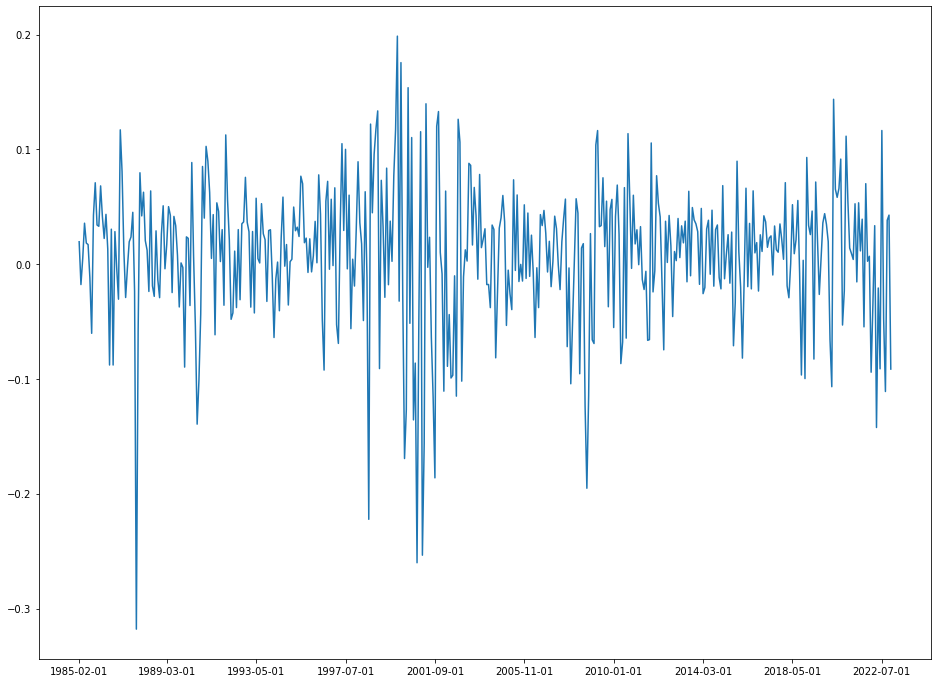

In [37]:
Nasdaq = plt.figure(figsize=(16,12))
plt.plot(Nasdaq_logdiff, label='NASDAQ')
plt.xticks(year)
plt.show()

In [38]:
Kosdaq = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/R & Python Programming/3-2 SelfStudy/Kosdaq.csv", index_col=0)

In [39]:
Kosdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-11-01,762.000000,834.400024,647.599976,672.599976,672.599976,6000100
2000-12-01,640.799988,716.900024,516.500000,525.799988,525.799988,4825700
2001-01-01,502.500000,859.200012,502.500000,843.599976,843.599976,9150500
2001-02-01,824.200012,896.099976,756.000000,767.599976,767.599976,9911600
2001-03-01,764.099976,781.400024,667.799988,684.299988,684.299988,7322200


In [40]:
Kosdaq_logdiff = []

for i in np.arange(1, len(Kosdaq.index)-2):
    Kosdaq_logdiff.append(np.log(Kosdaq['Adj Close'][i]) - np.log(Kosdaq['Adj Close'][i-1]))

In [44]:
len(Kosdaq_logdiff)

265

In [43]:
len(Kosdaq.index)

268

In [46]:
Kosdaq_logdiff = pd.DataFrame(Kosdaq_logdiff, index=Kosdaq.index[1:266])

In [47]:
Kosdaq_logdiff

,0
Date,
2000-12-01,-0.246230
2001-01-01,0.472758
2001-02-01,-0.094410
2001-03-01,-0.114872
2001-04-01,0.143257
...,...
2022-08-01,0.004247
2022-09-01,-0.182148
2022-10-01,0.033161


In [48]:
year_Kosdaq = Kosdaq_logdiff.index[[1,50,100,150,200,250]]

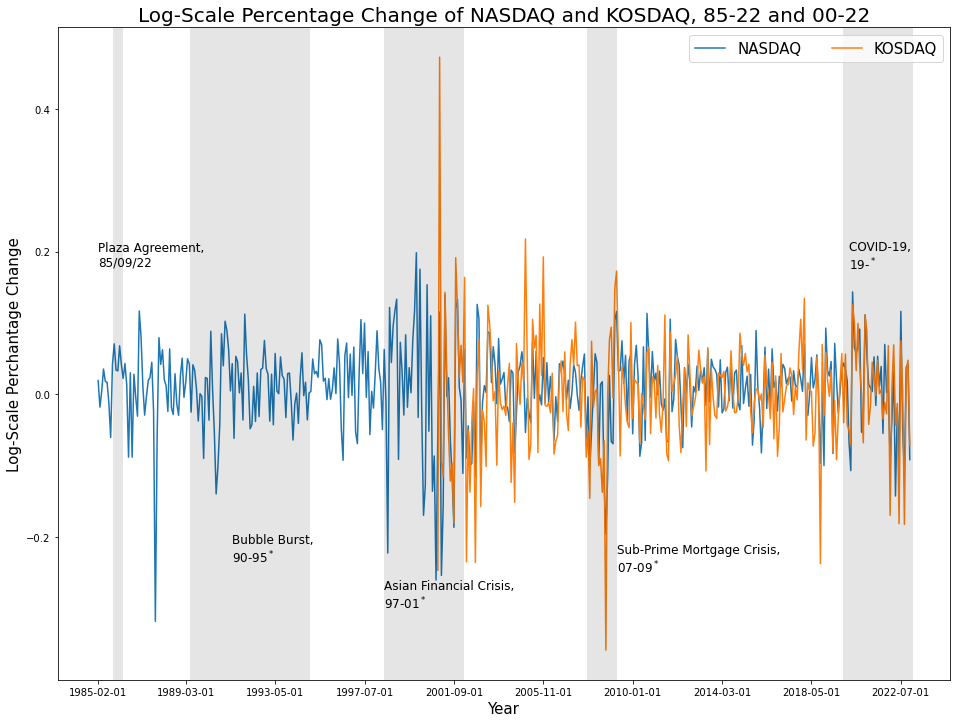

In [68]:
NasKos = plt.figure(figsize=(16,12))
plt.plot(Nasdaq_logdiff, label='NASDAQ')
plt.plot(Kosdaq_logdiff, label='KOSDAQ')
plt.legend(loc='upper right', ncol=2, fontsize=15)
plt.xticks(year)

plt.title("Log-Scale Percentage Change of NASDAQ and KOSDAQ, 85-22 and 00-22", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Log-Scale Perchantage Change", fontsize=15)

plt.axvline(x='1986-01-01', color='black', alpha=0.1, linestyle='-', linewidth=10)
plt.annotate('Plaza Agreement, \n85/09/22', xy=(0,0.2), xytext=(0,0.18), fontsize=12, color='black')
plt.axvline(x='1992-03-01', color='black', alpha=0.1, linestyle='-', linewidth=120)
plt.annotate('Bubble Burst, \n90-95$^*$', xy=(75,-0.25), xytext=(75,-0.235), fontsize=12, color='black')
plt.axvline(x='2000-04-01', color='black', alpha=0.1, linestyle='-', linewidth=80)
plt.annotate('Asian Financial Crisis, \n97-01$^*$', xy=(150,-0.3), xytext=(160,-0.3), fontsize=12, color='black')
plt.axvline(x='2008-08-01', color='black', alpha=0.1, linestyle='-', linewidth=30)
plt.annotate('Sub-Prime Mortgage Crisis, \n07-09$^*$', xy=(300, -0.25), xytext=(290, -0.25), fontsize=12, color='black')
plt.axvline(x='2021-06-01', color='black', alpha=0.1, linestyle='-', linewidth=70)
plt.annotate('COVID-19, \n19-$^*$', xy=(400,0.15), xytext=(420,0.175), fontsize=12, color='black')

plt.show()

In [69]:
NasKos.savefig("Log-Scale Percentage Change of NASDAQ and KOSDAQ.pdf")

In [70]:
NasKos.savefig("Log-Scale Percentage Change of NASDAQ and KOSDAQ.jpg")